In [30]:
import nltk
nltk.download('punkt') # Sentence tokenizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist

import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /Users/Ethan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
text = 'On Wednesday, the Association for Computing Machinery, the world’s largest society of computing professionals, announced that Hinton, LeCun and Bengio had won this year’s Turing Award for their work on neural networks. The Turing Award, which was introduced in 1966, is often called the Nobel Prize of computing, and it includes a $1 million prize, which the three scientists will share.'

### Sentence Tokenizer

In [5]:
sent_tk = sent_tokenize(text)
print(sent_tk)

['On Wednesday, the Association for Computing Machinery, the world’s largest society of computing professionals, announced that Hinton, LeCun and Bengio had won this year’s Turing Award for their work on neural networks.', 'The Turing Award, which was introduced in 1966, is often called the Nobel Prize of computing, and it includes a $1 million prize, which the three scientists will share.']


### Word Tokenizer

In [8]:
word_tk = word_tokenize(text)
print(word_tk)

['On', 'Wednesday', ',', 'the', 'Association', 'for', 'Computing', 'Machinery', ',', 'the', 'world', '’', 's', 'largest', 'society', 'of', 'computing', 'professionals', ',', 'announced', 'that', 'Hinton', ',', 'LeCun', 'and', 'Bengio', 'had', 'won', 'this', 'year', '’', 's', 'Turing', 'Award', 'for', 'their', 'work', 'on', 'neural', 'networks', '.', 'The', 'Turing', 'Award', ',', 'which', 'was', 'introduced', 'in', '1966', ',', 'is', 'often', 'called', 'the', 'Nobel', 'Prize', 'of', 'computing', ',', 'and', 'it', 'includes', 'a', '$', '1', 'million', 'prize', ',', 'which', 'the', 'three', 'scientists', 'will', 'share', '.']


### Removing stop words

In [11]:
sw = set(stopwords.words('english'))
print(f'English stop words {sw}')

English stop words {'very', 'they', 't', "didn't", 'wasn', "won't", 'of', 'myself', 'ours', 'i', 'ain', 'its', 'was', 'by', "you're", 'me', 'during', 'them', 'shan', 'which', 'haven', 'this', 'my', 'is', 'more', 'should', "weren't", 'won', "couldn't", 'be', 'about', 'he', 'most', 'an', 'where', 'now', "you'd", 'their', 'who', 'then', 'themselves', 'aren', 'into', 'while', 'at', 'that', 'same', 'herself', 'whom', 'few', 'weren', 'and', 'his', 'those', 'you', 'for', 'do', 'o', 'we', "should've", "mustn't", 'because', 'these', 'needn', 'what', 'out', 'didn', 'had', "aren't", 'she', 'couldn', 'been', 'not', "don't", 'having', 've', 'to', 'own', 'if', 'or', 'were', 'yourselves', 'too', 'how', "wouldn't", 'm', 'am', 'himself', 're', 'further', 'only', 'yourself', "wasn't", 'y', 'on', 'theirs', 'no', 'all', "you'll", 'up', 'just', 'other', 'with', 'when', 'each', 'but', 'yours', 'below', 'as', "haven't", "shan't", 'd', 'above', 'the', "it's", "needn't", 'through', 'over', 'll', 'have', 'in', 

In [17]:
filtered_text = [word for word in word_tk if not word in sw]
print(filtered_text)

['On', 'Wednesday', ',', 'Association', 'Computing', 'Machinery', ',', 'world', '’', 'largest', 'society', 'computing', 'professionals', ',', 'announced', 'Hinton', ',', 'LeCun', 'Bengio', 'year', '’', 'Turing', 'Award', 'work', 'neural', 'networks', '.', 'The', 'Turing', 'Award', ',', 'introduced', '1966', ',', 'often', 'called', 'Nobel', 'Prize', 'computing', ',', 'includes', '$', '1', 'million', 'prize', ',', 'three', 'scientists', 'share', '.']


### Stemming

In [23]:
port_stem = PorterStemmer()
stemmed_words = []
for word in filtered_text:
    stemmed_words.append(port_stem.stem(word))
print(f'Filtered sentence {filtered_text}\n')
print(f'Stemmed sentence {stemmed_words}')

Filtered sentence ['On', 'Wednesday', ',', 'Association', 'Computing', 'Machinery', ',', 'world', '’', 'largest', 'society', 'computing', 'professionals', ',', 'announced', 'Hinton', ',', 'LeCun', 'Bengio', 'year', '’', 'Turing', 'Award', 'work', 'neural', 'networks', '.', 'The', 'Turing', 'Award', ',', 'introduced', '1966', ',', 'often', 'called', 'Nobel', 'Prize', 'computing', ',', 'includes', '$', '1', 'million', 'prize', ',', 'three', 'scientists', 'share', '.']

Stemmed sentence ['On', 'wednesday', ',', 'associ', 'comput', 'machineri', ',', 'world', '’', 'largest', 'societi', 'comput', 'profession', ',', 'announc', 'hinton', ',', 'lecun', 'bengio', 'year', '’', 'ture', 'award', 'work', 'neural', 'network', '.', 'the', 'ture', 'award', ',', 'introduc', '1966', ',', 'often', 'call', 'nobel', 'prize', 'comput', ',', 'includ', '$', '1', 'million', 'prize', ',', 'three', 'scientist', 'share', '.']


### Lemmatizing

In [27]:
lem = WordNetLemmatizer()
lemm_words = []
for word in filtered_text:
    lemm_words.append(lem.lemmatize(word))

print(f'Filtered sentence {filtered_text}\n')
print(f'Lemmatized sentence {lemm_words}')

Filtered sentence ['On', 'Wednesday', ',', 'Association', 'Computing', 'Machinery', ',', 'world', '’', 'largest', 'society', 'computing', 'professionals', ',', 'announced', 'Hinton', ',', 'LeCun', 'Bengio', 'year', '’', 'Turing', 'Award', 'work', 'neural', 'networks', '.', 'The', 'Turing', 'Award', ',', 'introduced', '1966', ',', 'often', 'called', 'Nobel', 'Prize', 'computing', ',', 'includes', '$', '1', 'million', 'prize', ',', 'three', 'scientists', 'share', '.']

Lemmatized sentence ['On', 'Wednesday', ',', 'Association', 'Computing', 'Machinery', ',', 'world', '’', 'largest', 'society', 'computing', 'professional', ',', 'announced', 'Hinton', ',', 'LeCun', 'Bengio', 'year', '’', 'Turing', 'Award', 'work', 'neural', 'network', '.', 'The', 'Turing', 'Award', ',', 'introduced', '1966', ',', 'often', 'called', 'Nobel', 'Prize', 'computing', ',', 'includes', '$', '1', 'million', 'prize', ',', 'three', 'scientist', 'share', '.']


### Part of Speech tagging

In [28]:
pos_words = nltk.pos_tag(word_tk)
print(pos_words)

[('On', 'IN'), ('Wednesday', 'NNP'), (',', ','), ('the', 'DT'), ('Association', 'NNP'), ('for', 'IN'), ('Computing', 'VBG'), ('Machinery', 'NNP'), (',', ','), ('the', 'DT'), ('world', 'NN'), ('’', 'NNP'), ('s', 'RB'), ('largest', 'JJS'), ('society', 'NN'), ('of', 'IN'), ('computing', 'VBG'), ('professionals', 'NNS'), (',', ','), ('announced', 'VBD'), ('that', 'IN'), ('Hinton', 'NNP'), (',', ','), ('LeCun', 'NNP'), ('and', 'CC'), ('Bengio', 'NNP'), ('had', 'VBD'), ('won', 'VBN'), ('this', 'DT'), ('year', 'NN'), ('’', 'VBZ'), ('s', 'JJ'), ('Turing', 'NNP'), ('Award', 'NNP'), ('for', 'IN'), ('their', 'PRP$'), ('work', 'NN'), ('on', 'IN'), ('neural', 'JJ'), ('networks', 'NNS'), ('.', '.'), ('The', 'DT'), ('Turing', 'NNP'), ('Award', 'NNP'), (',', ','), ('which', 'WDT'), ('was', 'VBD'), ('introduced', 'VBN'), ('in', 'IN'), ('1966', 'CD'), (',', ','), ('is', 'VBZ'), ('often', 'RB'), ('called', 'VBN'), ('the', 'DT'), ('Nobel', 'NNP'), ('Prize', 'NNP'), ('of', 'IN'), ('computing', 'NN'), (',',

### Frequency Distribution Plot

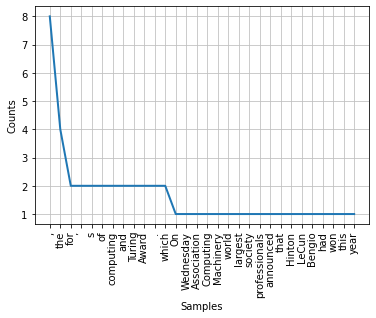

In [32]:
fd = FreqDist(word_tk)
fd.plot(30, cumulative=False)
plt.show()